In [13]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
df=pd.read_csv("fashion-mnist.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data=df.values
x=data[:,1:]
y=data[:,0]

x.shape,y.shape

((10000, 784), (10000,))

In [7]:
Counter(y)

Counter({0: 1000,
         1: 1000,
         2: 1000,
         3: 1000,
         8: 1000,
         6: 1000,
         5: 1000,
         4: 1000,
         7: 1000,
         9: 1000})

In [8]:
y=np_utils.to_categorical(y)
y.shape

(10000, 10)

In [9]:
x=x.reshape(x.shape[0],int(x.shape[1]**0.5),int(x.shape[1]**0.5),1)
x.shape

(10000, 28, 28, 1)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 37.69it/s]


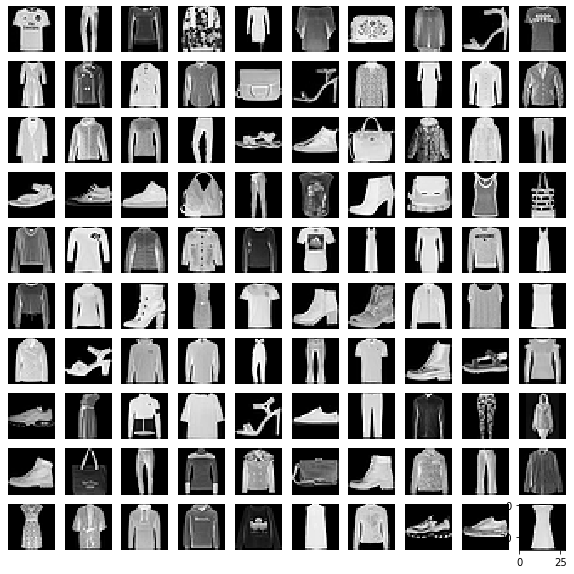

In [10]:
fig=plt.figure(figsize=(10,10))
for i in tqdm(range(100)):
    plt.axis("off")
    fig.add_subplot(10,10,i+1)
    plt.imshow(x[i].reshape(x.shape[1],x.shape[2]),cmap="gray")
    
plt.show()

In [14]:
model=Sequential()

model.add(Convolution2D(32,(3,3),padding="same",activation="relu",input_shape=(x.shape[1],x.shape[2],x.shape[3])))
model.add(Convolution2D(64,(3,3),padding="same",activation="relu"))

model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(32,(5,5),padding="same",activation="relu"))
model.add(Convolution2D(8,(5,5),padding="same",activation="relu"))

model.add(Flatten())
model.add(Dense(y.shape[1],activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 8)         6408      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist=model.fit(x,y,epochs=10,validation_split=0.2,verbose=2)

In [ ]:
plt.plot(hist.history["loss"],'g')
plt.plot(hist.history["val_loss"],'r')

plt.plot(hist.history["acc"],'b')
plt.plot(hist.history["val_acc"],'black')

plt.show()